#  Compresión sin pérdida de información para imágenes a colores 


In [1]:
import cv2 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import math
import pandas as pd

### PNG, GIF, WebP, BPG, FLIF, TIFF y BMP

In [2]:
img1 = cv2.imread('Captura 1.bpg')
img2 = cv2.imread('Captura 2.bpg')
img3 = cv2.imread('Captura 3.bpg')
img4 = cv2.imread('Captura 6.flif')
img5 = cv2.imread('Captura 7.flif')
img6 = cv2.imread('Captura 8.flif')
img10 = cv2.imread('Captura10_gif.gif')
img11 = cv2.imread('Captura11_gif.gif')
img12 = cv2.imread('Captura12_gif.gif')


img_webp_1 = cv2.imread('captura-4-webp.webp')
img_webp_2 = cv2.imread('captura-5-webp.webp')
img_webp_3 = cv2.imread('captura-9-webp.webp')


img_png_1 = cv2.imread('Captura 13.PNG')
img_png_2 = cv2.imread('Captura 14.PNG')
img_png_3 = cv2.imread('Captura 15.PNG')

img_bmp_1 = cv2.imread('Captura 1.bmp')
img_bmp_2 = cv2.imread('Captura 2.bmp')
img_bmp_3 = cv2.imread('Captura 3.bmp')

img_tif_1 = cv2.imread('Captura 1.tif')
img_tif_2 = cv2.imread('Captura 2.tif')
img_tif_3 = cv2.imread('Captura 3.tif')

### Nota para el profesor
Al cargar los distintos formatos de imágenes se realiza sin ningún error, sin embargo al momento de querer manipular las imágenes de formato .gif, .bpg y flif, no es permitida la acción, por lo que su procesamiento no ha podido realizarse, a continuación un código de error que se lanza al querer mostrar la imagen, por lo cual se decidió añadir los formatos TIF y BMP para estudiar comparaciones entre tipos de conversiones

TypeError: Image data of dtype object cannot be converted to float

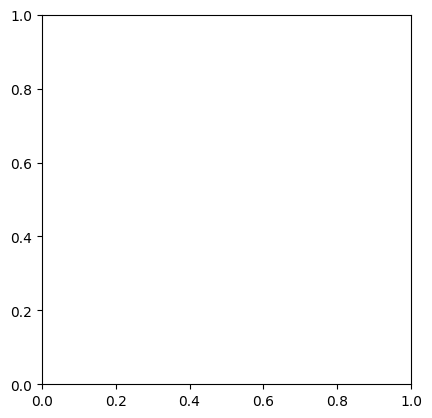

In [3]:
plt.imshow(img1) #de tipo bpg

## Indexación de color 

In [4]:
matriz = np.array(img_tif_1)
matriz

array(None, dtype=object)

### Nota 2 para el profesor. 
Debido a que la resolución de la pantalla en la que se está trabajando es de 1080x1920, al momento de tomar una captura de pantalla y querer procesarla por completo, los tiempos de procesamiento se convierten en algo poco eficiente para la revisión de un trabajo, por lo que se decidió hacer un recorte lógico de la imagen permitiendo así trabajar con una matriz de 128x128, a la cual se le aplicará los algoritmos solicitados

### Indexación de Color HEVC-SCC

In [26]:
def indexacion_color_hecv_scc(img):
    #cu 16*16
    matriz = np.array(img)
    M = 128

    matriz[0:16][0:16]
    
    CU = 16 
    all_pallete_index = []
    pallet_index = {}
    pallet_index['index']=[]
    pallet_index['color']=[]
    index = 0
    indexacion_color = []
    predictor_pallete = []
    predictor_code = []
    for i in range(0, M, CU):
        for j in range(0, M, CU):
            for i_s in range(i+16): 
                for j_s in range(j+16): 
                    if list(matriz[i_s][j_s]) not in pallet_index['color']:
                        pallet_index['color'].append(list(matriz[i_s][j_s]))
                        pallet_index['index'].append(index)
                        indexacion_color.append(list(matriz[i_s][j_s]))
                    if i == 0 and j==0 and list(matriz[i_s][j_s]) not in predictor_pallete: 
                        predictor_pallete.append(list(matriz[i_s][j_s]))
                        predictor_code.append(index)
                    index += 1

    pallet_index_df = pd.DataFrame(pallet_index, columns = ['color'], index = pallet_index['index'])

    return M, matriz, indexacion_color, predictor_pallete, predictor_code


### Visualización del array predictor

In [27]:
def visualizacion_array_predictor(predictor_pallete):
    predicted_df = pd.DataFrame(predictor_pallete, columns = ['R','G', 'B'])
    predicted_df
    return predicted_df

### Creación de Array de color y Flags
El siguiente Array de color de la imagen es equivalente en este programa al array 'A' mencionado en el pdf 'HEVC – SCC Palette Mode' que se encuentra en la sección de materiales de apoyo 2 del aula virtual 
### Visualización de Array de color

In [28]:
def array_de_color(M, matrix, indexacion_color, predictor_code):
    array_color=[]
    array_flag=[]
    for i in range(M):
        for j in range(M):
            array_color.append(indexacion_color.index(list(matriz[i][j])))

    for i in range(256, len(array_color), 1): 
        if array_color[i] in predictor_code:
            array_flag.append(1)
        else: 
            array_flag.append(0)
    return array_color, array_flag

### Visualización de Flag array

### Histograma con Array A

In [29]:
import matplotlib.pyplot as plot
def histograma_A(array_color):
    datos = pd.Series(array_color) # cargamos los datos en un objeto Series
    intervalos = range(min(datos), max(datos) + 2)  # calculamos los extremos de los intervalos

    datos.plot.hist(bins=100, color='#F2AB6D', rwidth=0.85) # generamos el histograma a partir de los datos
    plot.xticks(intervalos)
    plot.ylabel('Frecuencia')
    plot.xlabel('colores')
    plot.title('Histograma de Arreglo A')

    plot.show()

### Aplicación F8

In [30]:
def freeman_8(array_color):
    colores_unicos = list(set(array_color))
    colores_unicos.sort()
    frecuencias = []
    lista_f8 =[]
    for element in colores_unicos:
        frecuencias.append(array_color.count(element))
    for i in range(1,len(frecuencias), 1): 
        if frecuencias[i] == frecuencias[i-1]: 
            lista_f8.append(0)
        elif frecuencias[i] < frecuencias[i-1]: 
            for j in range(frecuencias[i-1] - frecuencias[i]):
                lista_f8.append(6)
        elif frecuencias[i-1] < frecuencias[i]: 
            for j in range(frecuencias[i] - frecuencias[i-1]):
                lista_f8.append(2)

    return lista_f8, frecuencias 

### Aplicacion AF8

In [31]:
def freeman_a8(frecuencias):
    lista_af8 =[]
    for i in range(1,len(frecuencias), 1): 
        if frecuencias[i] == frecuencias[i-1]: 
            lista_af8.append(0)
        elif frecuencias[i] < frecuencias[i-1]: 
            lista_af8.append(4)
        elif frecuencias[i-1] < frecuencias[i]: 
            lista_af8.append(3)

    return lista_af8

### Desarrollo de Método Huffman

In [48]:
class Nodo: 
    def __init__(self, data, code):
        self.left = None
        self.right = None
        self.data = data
        self.code = code 

In [76]:
def calculo_fimg(img, lista_f8, lista_af8):
    fimg = img.flatten().tolist()
    pxs = len(fimg)
    tbl = Counter(fimg)
    
    pxs_f8 = len(lista_f8)
    pxs_af8 = len(lista_af8)
    tbl_f8 = Counter(lista_f8)
    tbl_af8 = Counter(lista_af8)
    
    ntbl = {k:v/pxs for k,v in tbl.items()}
    ntbl = dict(sorted(ntbl.items(), key=lambda item: item[1]))
    ntbl_f8 = {k:v/pxs_f8 for k,v in tbl_f8.items()}
    ntbl_f8 = dict(sorted(ntbl.items(), key=lambda item: item[1]))
    ntbl_af8 = {k:v/pxs_af8 for k,v in tbl_af8.items()}
    ntbl_af8 = dict(sorted(ntbl.items(), key=lambda item: item[1]))
    return ntbl, tbl, ntbl_f8, ntbl_af8, fimg

In [77]:
ntbl

{2: 3.858024691358025e-06,
 5: 4.179526748971193e-06,
 1: 5.626286008230453e-06,
 4: 6.751543209876544e-06,
 3: 8.037551440329219e-06,
 6: 1.3342335390946502e-05,
 253: 1.478909465020576e-05,
 133: 1.8164866255144033e-05,
 103: 2.0415380658436213e-05,
 137: 2.170138888888889e-05,
 81: 2.218364197530864e-05,
 139: 2.2987397119341563e-05,
 197: 2.3148148148148147e-05,
 108: 2.3308899176954734e-05,
 111: 2.3469650205761318e-05,
 74: 2.395190329218107e-05,
 251: 2.4112654320987653e-05,
 79: 2.475565843621399e-05,
 149: 2.7166923868312758e-05,
 35: 2.764917695473251e-05,
 75: 2.9417438271604938e-05,
 100: 2.973894032921811e-05,
 39: 3.0060442386831276e-05,
 246: 3.070344650205761e-05,
 119: 3.166795267489712e-05,
 202: 3.198945473251029e-05,
 97: 3.247170781893004e-05,
 41: 3.263245884773662e-05,
 181: 3.263245884773662e-05,
 92: 3.279320987654321e-05,
 36: 3.359696502057613e-05,
 33: 3.375771604938271e-05,
 32: 3.504372427983539e-05,
 38: 3.536522633744856e-05,
 186: 3.536522633744856e-05,

In [78]:
ntbl_f8

{2: 3.858024691358025e-06,
 5: 4.179526748971193e-06,
 1: 5.626286008230453e-06,
 4: 6.751543209876544e-06,
 3: 8.037551440329219e-06,
 6: 1.3342335390946502e-05,
 253: 1.478909465020576e-05,
 133: 1.8164866255144033e-05,
 103: 2.0415380658436213e-05,
 137: 2.170138888888889e-05,
 81: 2.218364197530864e-05,
 139: 2.2987397119341563e-05,
 197: 2.3148148148148147e-05,
 108: 2.3308899176954734e-05,
 111: 2.3469650205761318e-05,
 74: 2.395190329218107e-05,
 251: 2.4112654320987653e-05,
 79: 2.475565843621399e-05,
 149: 2.7166923868312758e-05,
 35: 2.764917695473251e-05,
 75: 2.9417438271604938e-05,
 100: 2.973894032921811e-05,
 39: 3.0060442386831276e-05,
 246: 3.070344650205761e-05,
 119: 3.166795267489712e-05,
 202: 3.198945473251029e-05,
 97: 3.247170781893004e-05,
 41: 3.263245884773662e-05,
 181: 3.263245884773662e-05,
 92: 3.279320987654321e-05,
 36: 3.359696502057613e-05,
 33: 3.375771604938271e-05,
 32: 3.504372427983539e-05,
 38: 3.536522633744856e-05,
 186: 3.536522633744856e-05,

In [79]:
def huffman(ntbl):
    arbol = Nodo(1, '0')
    codigos = {}
    bits = {}
    lista_pixeles = []
    for element in ntbl: 
        lista_pixeles.append(element)

    for i in range(len(lista_pixeles)-1, -1, -2): 
        if i == len(lista_pixeles)-1:
            arbol.right = Nodo(lista_pixeles[i],'0')
            arbol.left = Nodo(lista_pixeles[i-1],'1')
        else:
            arbol.right = Nodo(lista_pixeles[i],arbol.code+'0')
            arbol.left = Nodo(lista_pixeles[i-1],arbol.code+'1')
        codigos[arbol.right.data] = arbol.right.code
        codigos[arbol.left.data] = arbol.left.code
        bits[arbol.right.data] = len(arbol.left.code)
        bits[arbol.left.data] = len(arbol.left.code)
        arbol = arbol.right
    return codigos, bits
    
    

## Codificador entrópico: Aritmético

### Probabilidad de aparición

In [80]:
ntbl

{2: 3.858024691358025e-06,
 5: 4.179526748971193e-06,
 1: 5.626286008230453e-06,
 4: 6.751543209876544e-06,
 3: 8.037551440329219e-06,
 6: 1.3342335390946502e-05,
 253: 1.478909465020576e-05,
 133: 1.8164866255144033e-05,
 103: 2.0415380658436213e-05,
 137: 2.170138888888889e-05,
 81: 2.218364197530864e-05,
 139: 2.2987397119341563e-05,
 197: 2.3148148148148147e-05,
 108: 2.3308899176954734e-05,
 111: 2.3469650205761318e-05,
 74: 2.395190329218107e-05,
 251: 2.4112654320987653e-05,
 79: 2.475565843621399e-05,
 149: 2.7166923868312758e-05,
 35: 2.764917695473251e-05,
 75: 2.9417438271604938e-05,
 100: 2.973894032921811e-05,
 39: 3.0060442386831276e-05,
 246: 3.070344650205761e-05,
 119: 3.166795267489712e-05,
 202: 3.198945473251029e-05,
 97: 3.247170781893004e-05,
 41: 3.263245884773662e-05,
 181: 3.263245884773662e-05,
 92: 3.279320987654321e-05,
 36: 3.359696502057613e-05,
 33: 3.375771604938271e-05,
 32: 3.504372427983539e-05,
 38: 3.536522633744856e-05,
 186: 3.536522633744856e-05,

In [81]:
def acumulados(ntbl, fimg):
    suma_acumulada = 0
    acumulativos = {}
    acumulativos_lista = [0]
    codificacion = {}
    codificacion_lista = []
    for item in ntbl:
        suma_acumulada+= ntbl[item]
        acumulativos[item] = suma_acumulada
        acumulativos_lista.append(suma_acumulada)
    highest = 1
    lowest = 0
    cnt = 0
    codificion = codificador_aritmetico(highest, lowest, cnt+1, ntbl, codificacion, codificacion_lista, acumulativos, acumulativos_lista, fimg)
    return codificacion

def codificador_aritmetico(highest, lowest, cnt, ntbl, codificacion, codificacion_lista, acumulativos, acumulativos_lista, fimg):
    if cnt == 1000: 
        return codificacion
    for i, value in enumerate(acumulativos):
        codificacion[value] = acumulativos_lista[i]+(ntbl[value]*(highest-lowest))
        codificacion_lista.append(codificacion[value])
    
    indice_alto = codificacion_lista.index(codificacion[fimg[cnt]])
    highest = codificacion_lista[indice_alto]
    lowest = codificacion_lista[indice_alto-1]
    codificador_aritmetico(highest, lowest, cnt+1, ntbl, codificacion, codificacion_lista, acumulativos, acumulativos_lista, fimg)
    


### Codificación binaria con base al método de compresión aritmético

In [82]:
from decimal import Decimal
def float_bin(number, places = 3): 
    whole, dec = str(number).split(".")    
    
    whole = int(whole) 
    dec = Decimal(dec) 
    dec = Decimal(str(dec).split(".")[0])
    res = bin(whole).lstrip("0b") + "."
    for x in range(places): 
        whole, dec = str((decimal_converter(dec)) * 2).split(".") 
        dec = int(dec) 
        res += whole 
  
    return res 
def decimal_converter(num):  
    while num > 1: 
        num /= 10
    return num 

In [83]:

def codificacion_binaria(codificacion):
    codigo_binario = {}
    bits_aritmetico = {}
    for value in codificacion:
        N = round(math.log(1/codificacion[value]))+1
        temp = float_bin(codificacion[value], N)
        codigo_binario[value] = temp.split(".")[1]
        bits_aritmetico[value] = len(codigo_binario[value])
    return bits_aritmetico

### Razón de compresión respecto al formato WebP

In [84]:
#HUFFMAN CODE

def pixeles(bits, tbl, img, bits_aritmetico): 
    bits_por_pixel = 24
    suma_total_bits_huffman, suma_total_bits_aritmetico = 0, 0
    pixeles_original = len(img)*len(img[0])*3*bits_por_pixel
    print(len(bits), len(tbl))
    for value in tbl: 
        suma_total_bits_huffman += bits[value]*tbl[value]
        suma_total_bits_aritmetico += bits_aritmetico[value]*tbl[value]
    razon_huffman =  pixeles_original/suma_total_bits_huffman
    razon_aritmetica = pixeles_original/suma_total_bits_aritmetico
    return suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica 


## Tabla de comparación 

In [85]:
import pandas as pd
pixeles_compresion_imagenes_huffman = {}
pixeles_compresion_imagenes_aritmetica = {}
razon_compresion_imagenes_huffman = {}
razon_compresion_imagenes_aritmetica = {}
pixeles_imagenes = {}

In [86]:
def imagenes_png(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt):
    if cnt == 0:
        pixeles_imagenes['png'] = [pixeles_original]
        pixeles_compresion_imagenes_huffman['png'] = [suma_total_bits_huffman]
        pixeles_compresion_imagenes_aritmetica['png'] = [suma_total_bits_aritmetico]
        razon_compresion_imagenes_huffman['png'] = [razon_huffman]
        razon_compresion_imagenes_aritmetica['png'] = [razon_aritmetica]
    else: 
        pixeles_imagenes['png'].append(pixeles_original)
        pixeles_compresion_imagenes_huffman['png'].append(suma_total_bits_huffman)
        pixeles_compresion_imagenes_aritmetica['png'].append(suma_total_bits_aritmetico)
        razon_compresion_imagenes_huffman['png'].append(razon_huffman)
        razon_compresion_imagenes_aritmetica['png'].append(razon_aritmetica)
        
    return pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica
def imagenes_bmp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt):
    if cnt == 0: 
        pixeles_imagenes['bmp'] = [pixeles_original]
        pixeles_compresion_imagenes_huffman['bmp'] = [suma_total_bits_huffman]
        pixeles_compresion_imagenes_aritmetica['bmp'] = [suma_total_bits_aritmetico]
        razon_compresion_imagenes_huffman['bmp'] = [razon_huffman]
        razon_compresion_imagenes_aritmetica['bmp'] = [razon_aritmetica]
    else: 
        pixeles_imagenes['bmp'].append(pixeles_original)
        pixeles_compresion_imagenes_huffman['bmp'].append(suma_total_bits_huffman)
        pixeles_compresion_imagenes_aritmetica['bmp'].append(suma_total_bits_aritmetico)
        razon_compresion_imagenes_huffman['bmp'].append(razon_huffman)
        razon_compresion_imagenes_aritmetica['bmp'].append(razon_aritmetica)
    return pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica

def imagenes_tif(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt):
    if cnt == 0:
        pixeles_imagenes['tif'] = [pixeles_original]
        pixeles_compresion_imagenes_huffman['tif'] = [suma_total_bits_huffman]
        pixeles_compresion_imagenes_aritmetica['tif'] = [suma_total_bits_aritmetico]
        razon_compresion_imagenes_huffman['tif'] = [razon_huffman]
        razon_compresion_imagenes_aritmetica['tif'] = [razon_aritmetica]
    else: 
        pixeles_imagenes['tif'].append(pixeles_original)
        pixeles_compresion_imagenes_huffman['tif'].append(suma_total_bits_huffman)
        pixeles_compresion_imagenes_aritmetica['tif'].append(suma_total_bits_aritmetico)
        razon_compresion_imagenes_huffman['tif'].append(razon_huffman)
        razon_compresion_imagenes_aritmetica['tif'].append(razon_aritmetica)
    return pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica

def imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt):
    if cnt == 0:
        pixeles_imagenes['webp'] = [pixeles_original]
        pixeles_compresion_imagenes_huffman['webp'] = [suma_total_bits_huffman]
        pixeles_compresion_imagenes_aritmetica['webp'] = [suma_total_bits_aritmetico]
        razon_compresion_imagenes_huffman['webp'] = [razon_huffman]
        razon_compresion_imagenes_aritmetica['webp'] = [razon_aritmetica]
    else: 
        pixeles_imagenes['webp'].append(pixeles_original)
        pixeles_compresion_imagenes_huffman['webp'].append(suma_total_bits_huffman)
        pixeles_compresion_imagenes_aritmetica['webp'].append(suma_total_bits_aritmetico)
        razon_compresion_imagenes_huffman['webp'].append(razon_huffman)
        razon_compresion_imagenes_aritmetica['webp'].append(razon_aritmetica)
    return pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica
        

## Imágenes PNG

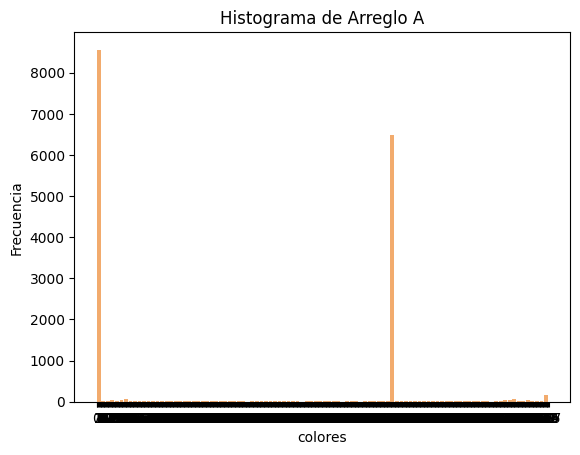

256 256


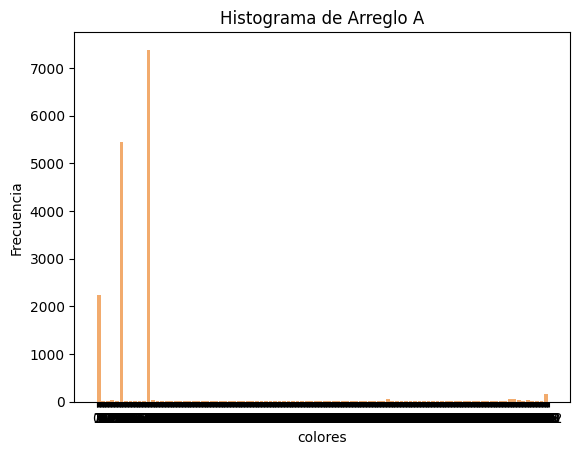

256 256


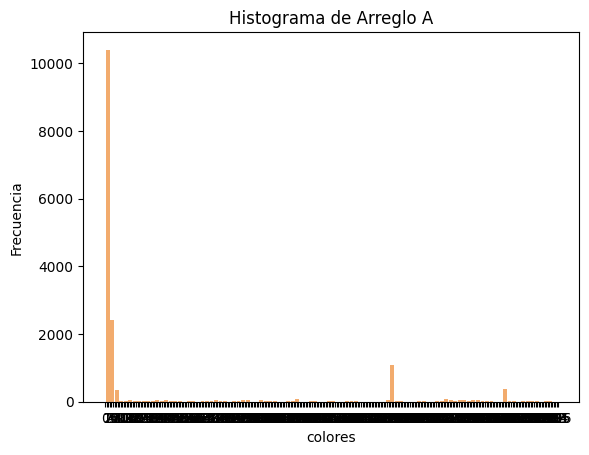

256 256


In [188]:
cnt = 0
############################################# IMAGEN 1 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_png_1)
array_color_png1, array_flag_png1 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_png1)
lista_f8_png1, frecuencias = freeman_8(array_color_png1)
lista_af8_png1 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_png_1, lista_f8_png1, lista_af8_png1)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 

##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_png_1, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_png(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)
cnt += 1
############################################# IMAGEN 2 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_png_2)
array_color_png2, array_flag_png2 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_png2)
lista_f8_png2, frecuencias = freeman_8(array_color_png2)
lista_af8_png2 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg  = calculo_fimg(img_png_2, lista_f8_png2, lista_af8_png2)
codigos, bits = huffman(ntbl)
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_png_2, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_png(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)



############################################# IMAGEN 3 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_png_3)
array_color_png3, array_flag_png3 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_png3)
lista_f8_png3, frecuencias = freeman_8(array_color_png3)
lista_af8_png3 = freeman_a8(frecuencias)
ntbl, tbl,ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_png_3, lista_f8_png3, lista_af8_png3)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_png_3, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_png(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)





## Imágenes Webp

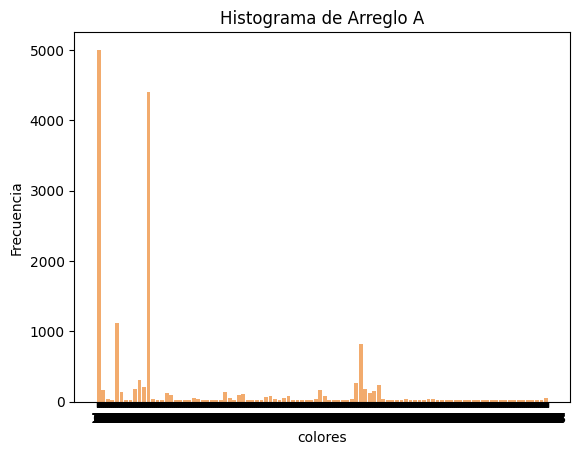

256 256


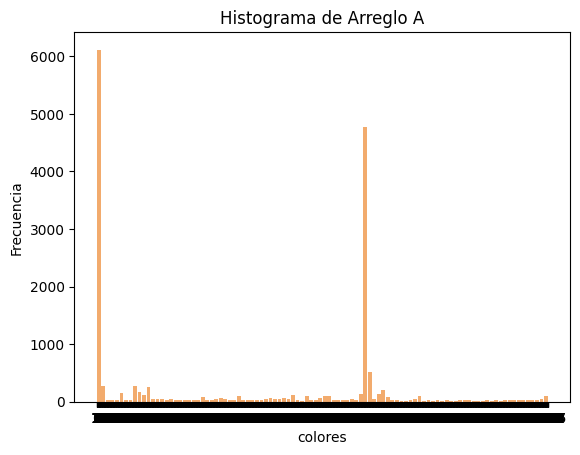

256 256


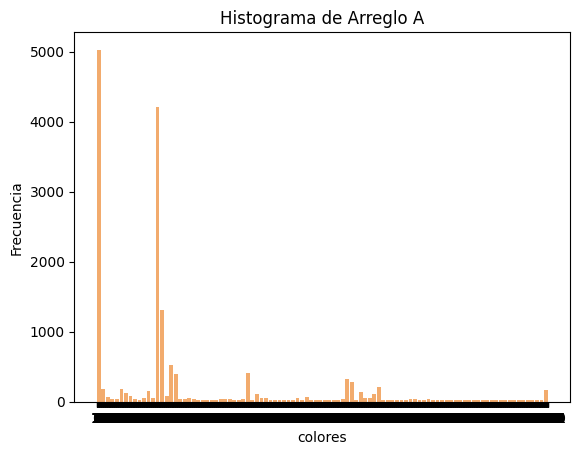

256 256


In [189]:
cnt = 0
############################################# IMAGEN 1 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_webp_1)
array_color_webp1, array_flag_webp1 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_webp1)
lista_f8_webp1, frecuencias = freeman_8(array_color_webp1)
lista_af8_webp1 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_webp_1, lista_f8_webp1, lista_af8_webp1)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 

##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)


###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_webp_1, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)
cnt += 1
############################################# IMAGEN 2 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_webp_2)
array_color_webp2, array_flag_webp2 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_webp2)
lista_f8_webp2, frecuencias = freeman_8(array_color_webp2)
lista_af8_webp2 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_webp_2, lista_f8_webp2, lista_af8_webp2)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_webp_2, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)



############################################# IMAGEN 3 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_webp_3)
array_color_webp3, array_flag_webp3 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_webp3)
lista_f8_webp3, frecuencias = freeman_8(array_color_webp3)
lista_af8_webp3 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_webp_3, lista_f8_webp3, lista_af8_webp3)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_webp_3, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)





## Imágenes bmp 

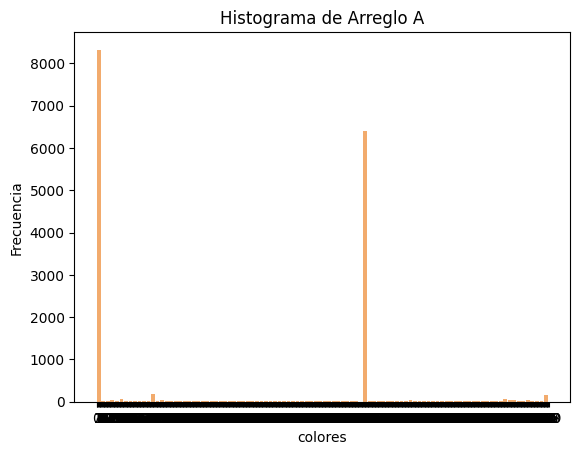

256 256


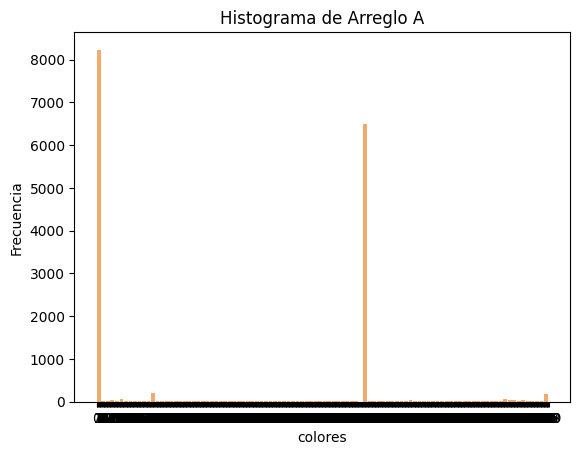

256 256


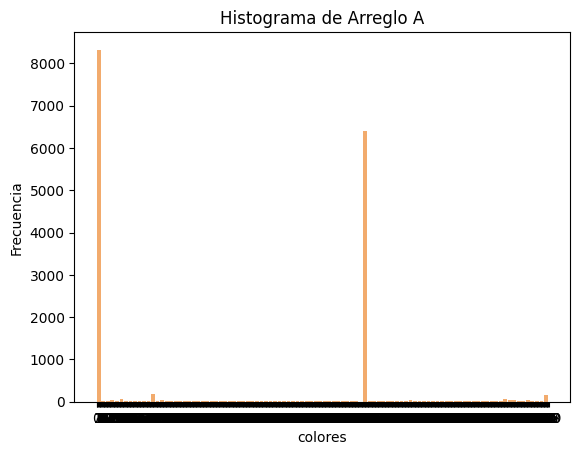

256 256


In [190]:
cnt = 0 
############################################# IMAGEN 1 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_bmp_1)
array_color_bmp1, array_flag_bmp1 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_bmp1)
lista_f8_bmp1, frecuencias = freeman_8(array_color_bmp1)
lista_af8_bmp1 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_bmp_1, lista_f8_bmp1, lista_af8_bmp1)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8)
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_bmp_1, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_bmp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)
cnt += 1
############################################# IMAGEN 2 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_bmp_2)
array_color_bmp2, array_flag_bmp2 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_bmp2)
lista_f8_bmp2, frecuencias = freeman_8(array_color_bmp2)
lista_af8_bmp2 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_bmp_2, lista_af8_bmp2, lista_af8_bmp2)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8)
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_bmp_2, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_bmp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)

############################################# IMAGEN 3 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_bmp_3)
array_color_bmp3, array_flag_bmp3 = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color_bmp3)
lista_f8_bmp3, frecuencias = freeman_8(array_color_bmp3)
lista_af8_bmp3 = freeman_a8(frecuencias)
ntbl, tbl, ntbl_f8, ntbl_af8, fimg = calculo_fimg(img_bmp_3, lista_f8_bmp3, lista_af8_bmp3)
codigos, bits = huffman(ntbl) 
codigos_f8, bits_f8 = huffman(ntbl_f8) 
codigos_af8, bits_af8 = huffman(ntbl_af8)
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl, fimg)
bits_aritmetico = codificacion_binaria(codificacion)

codificacion_f8 = acumulados(ntbl_f8, fimg)
bits_aritmetico_f8 = codificacion_binaria(codificacion_f8)

codificacion_af8 = acumulados(ntbl_af8, fimg)
bits_aritmetico_af8 = codificacion_binaria(codificacion_af8)

###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits_af8, tbl, img_bmp_3, bits_aritmetico_af8)
pixeles_imagenes, pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_bmp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)



## Imágenes TIF 

cnt = 0
############################################# IMAGEN 1 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_tif_1)
array_color, array_flag = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color)
lista_f8, frecuencias = freeman_8(array_color)
lista_af8 = freeman_a8(frecuencias)
ntbl, tbl = calculo_fimg(img_tif_1)
codigos, bits = huffman(ntbl) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl)
bits_aritmetico = codificacion_binaria(codificacion)
###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits, tbl, img_tif_1)
pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)
cnt += 1
############################################# IMAGEN 2 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_tif_2)
array_color, array_flag = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color)
lista_f8, frecuencias = freeman_8(array_color)
lista_af8 = freeman_a8(frecuencias)
ntbl, tbl = calculo_fimg(img_tif_2)
codigos, bits = huffman(ntbl) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl)
bits_aritmetico = codificacion_binaria(codificacion)
###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits, tbl, img_tif_2)
pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)



############################################# IMAGEN 3 #########################################
M, matriz, indexacion_color, predictor_pallete, predictor_code = indexacion_color_hecv_scc(img_tif_3)
array_color, array_flag = array_de_color(M, matriz, indexacion_color, predictor_code)
histograma_A(array_color)
lista_f8, frecuencias = freeman_8(array_color)
lista_af8 = freeman_a8(frecuencias)
ntbl, tbl = calculo_fimg(img_tif_3)
codigos, bits = huffman(ntbl) 
##### CODIFICADOR ARITMETICO ####### 
codificacion = acumulados(ntbl)
bits_aritmetico = codificacion_binaria(codificacion)
###### CALCULOS DE COMPARACION #######
suma_total_bits_huffman, suma_total_bits_aritmetico, pixeles_original, razon_huffman, razon_aritmetica = pixeles(bits, tbl, img_tif_3)
pixeles_compresion_imagenes_huffman, pixeles_compresion_imagenes_aritmetica, razon_compresion_imagenes_huffman, razon_compresion_imagenes_aritmetica = imagenes_webp(pixeles_original, suma_total_bits_huffman, suma_total_bits_aritmetico, razon_huffman, razon_aritmetica, cnt)





In [191]:
datos = {'pixeles_originales': [pixeles_imagenes['webp'], pixeles_imagenes['png'], pixeles_imagenes['bmp']],
        'pixeles Huffman': [pixeles_compresion_imagenes_huffman['webp'], pixeles_compresion_imagenes_huffman['png'], pixeles_compresion_imagenes_huffman['bmp']],
        'pixeles Aritmetico': [pixeles_compresion_imagenes_aritmetica['webp'], pixeles_compresion_imagenes_aritmetica['png'], pixeles_compresion_imagenes_aritmetica['bmp']]
        
        }
datos_razon ={
    'razon Huffman': [razon_compresion_imagenes_huffman['webp'], razon_compresion_imagenes_huffman['png'],razon_compresion_imagenes_huffman['bmp']],
    'razon Aritmetica': [razon_compresion_imagenes_aritmetica['webp'], razon_compresion_imagenes_aritmetica['png'], razon_compresion_imagenes_aritmetica['bmp']]
}
df2 = pd.DataFrame (datos_razon, columns = ['razon Huffman', 'razon Aritmetica'], index = ['webp', 'png', 'bmp'])
df = pd.DataFrame (datos, columns = ['pixeles_originales', 'pixeles Huffman', 'pixeles Aritmetico'], index = ['webp', 'png', 'bmp'])
df2
df

,pixeles_originales,pixeles Huffman,pixeles Aritmetico
webp,"[149143680, 149299200, 148910400]","[60061529, 54446836, 71996416]","[12288760, 12731471, 12352540]"
png,"[149299200, 149299200, 149299200]","[17804358, 25260111, 21084905]","[14783158, 12953656, 12380621]"
bmp,"[149299200, 148729392, 149299200]","[39763538, 71151253, 42546371]","[14681524, 12498261, 12374818]"


[149143680, 149299200, 148910400]
[0 1 2]


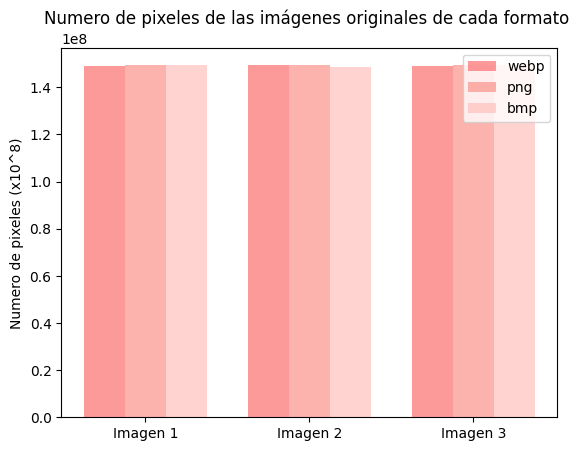

In [192]:
X = list(df.columns)
Ywebp = df.loc['webp']
Ypng = df.loc['png']
Ybmp = df.loc['bmp']
print(Ywebp[0])
width = 0.25
X_axis = np.arange(3)
print(X_axis)

fig, ax = plt.subplots()
ax.bar(X_axis, Ywebp[0], width, label = 'webp', alpha = 0.7, color = '#fc6f6f')
ax.bar(X_axis + width, Ypng[0], width, label = 'png', alpha = 0.7, color = '#fb928a')
ax.bar(X_axis + width*2, Ybmp[0], width, label = 'bmp', alpha = 0.7, color = '#ffc1bc')

plt.xticks(X_axis+width, ['Imagen 1', 'Imagen 2', 'Imagen 3'])
plt.xlabel("")
plt.ylabel("Numero de pixeles (x10^8)")
plt.title("Numero de pixeles de las imágenes originales de cada formato ")
plt.legend()
plt.set_cmap('cool')


[149143680, 149299200, 148910400]
[0 1 2]


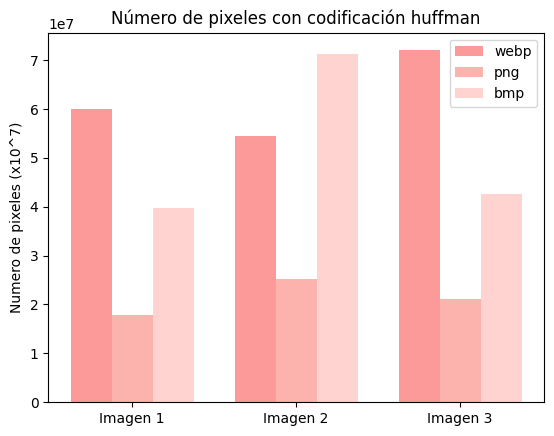

In [193]:
X = list(df.columns)
Ywebp = df.loc['webp']
Ypng = df.loc['png']
Ybmp = df.loc['bmp']
print(Ywebp[0])
width = 0.25
X_axis = np.arange(3)
print(X_axis)
plt.bar(X_axis, Ywebp[1], width, label = 'webp', alpha = 0.7, color = '#fc6f6f')
plt.bar(X_axis + width, Ypng[1], width, label = 'png', alpha = 0.7, color = '#fb928a')
plt.bar(X_axis + width*2, Ybmp[1], width, label = 'bmp', alpha = 0.7, color = '#ffc1bc')
  
plt.xticks(X_axis+width, ['Imagen 1', 'Imagen 2', 'Imagen 3'])
plt.xlabel("")
plt.ylabel("Numero de pixeles (x10^7)")
plt.title("Número de pixeles con codificación huffman")
plt.legend()
plt.show()

[149143680, 149299200, 148910400]
[0 1 2]


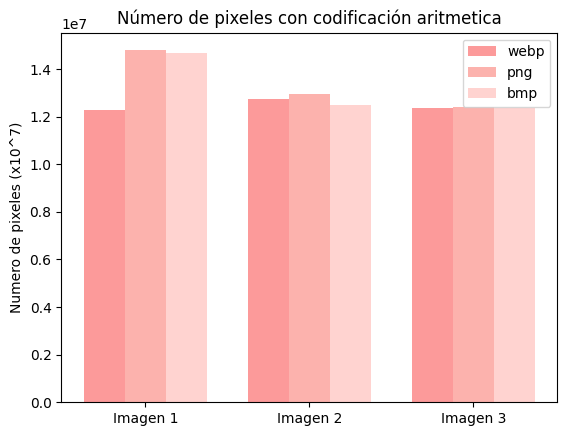

In [194]:
X = list(df.columns)
Ywebp = df.loc['webp']
Ypng = df.loc['png']
Ybmp = df.loc['bmp']
print(Ywebp[0])
width = 0.25
X_axis = np.arange(3)
print(X_axis)
plt.bar(X_axis, Ywebp[2], width, label = 'webp', alpha = 0.7, color = '#fc6f6f')
plt.bar(X_axis + width, Ypng[2], width, label = 'png', alpha = 0.7, color = '#fb928a')
plt.bar(X_axis + width*2, Ybmp[2], width, label = 'bmp', alpha = 0.7, color = '#ffc1bc')
  
plt.xticks(X_axis+width, ['Imagen 1', 'Imagen 2', 'Imagen 3'])
plt.xlabel("")
plt.ylabel("Numero de pixeles (x10^7)")
plt.title("Número de pixeles con codificación aritmetica")
plt.legend()
plt.show()

[0 1 2]


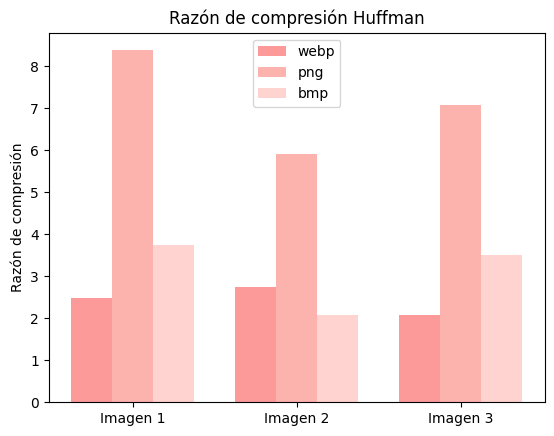

In [199]:
X = list(df2.columns)
Ywebp = df2.loc['webp']
Ypng = df2.loc['png']
Ybmp = df2.loc['bmp']
df2
width = 0.25
X_axis = np.arange(3)
print(X_axis)
plt.bar(X_axis, Ywebp[0], width, label = 'webp', alpha = 0.7, color = '#fc6f6f')
plt.bar(X_axis + width, Ypng[0], width, label = 'png', alpha = 0.7, color = '#fb928a')
plt.bar(X_axis + width*2, Ybmp[0], width, label = 'bmp', alpha = 0.7, color = '#ffc1bc')
  
plt.xticks(X_axis+width, ['Imagen 1', 'Imagen 2', 'Imagen 3'])
plt.xlabel("")
plt.ylabel("Razón de compresión")
plt.title("Razón de compresión Huffman")
plt.legend()
plt.show()

[0 1 2]


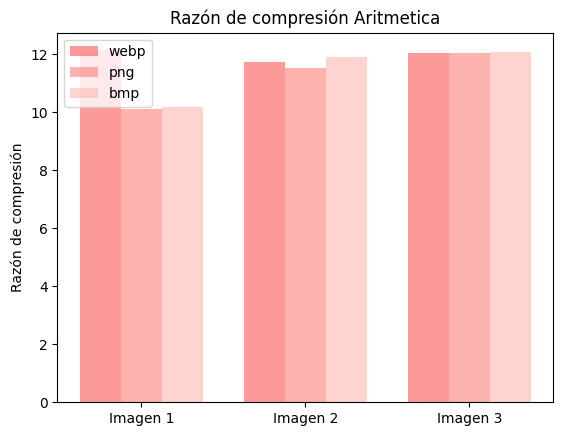

In [200]:
X = list(df2.columns)
Ywebp = df2.loc['webp']
Ypng = df2.loc['png']
Ybmp = df2.loc['bmp']
df2
width = 0.25
X_axis = np.arange(3)
print(X_axis)
plt.bar(X_axis, Ywebp[1], width, label = 'webp', alpha = 0.7, color = '#fc6f6f')
plt.bar(X_axis + width, Ypng[1], width, label = 'png', alpha = 0.7, color = '#fb928a')
plt.bar(X_axis + width*2, Ybmp[1], width, label = 'bmp', alpha = 0.7, color = '#ffc1bc')
  
plt.xticks(X_axis+width, ['Imagen 1', 'Imagen 2', 'Imagen 3'])
plt.xlabel("")
plt.ylabel("Razón de compresión")
plt.title("Razón de compresión Aritmetica")
plt.legend()
plt.show()

# Comparaciones razón de compresión

In [201]:
print(df2.to_markdown())

|      | razon Huffman                                               | razon Aritmetica                                             |
|:-----|:------------------------------------------------------------|:-------------------------------------------------------------|
| webp | [2.4831815387184033, 2.7421097527136378, 2.068302955524897] | [12.136593114358162, 11.726783181613499, 12.055042930441836] |
| png  | [8.385542461008704, 5.910472839964955, 7.08085713452349]    | [10.09927648747311, 11.525641872842694, 12.059104305026379]  |
| bmp  | [3.75467595463965, 2.0903270951531945, 3.509093642792707]   | [10.169189520107041, 11.900006888958393, 12.064759255449252] |


# Resumen de Compresión

In [202]:
relacion_entre_razones = []
mayor, promedio_mayor = 0, 0
promedio = 0
for i in range(len(df2['razon Huffman'])): 
    relacion_entre_razones.append((df2['razon Aritmetica']['webp'][i]*100)/df2['razon Huffman']['webp'][i])
    relacion_entre_razones.append((df2['razon Aritmetica']['png'][i]*100)/df2['razon Huffman']['png'][i])
    relacion_entre_razones.append((df2['razon Aritmetica']['bmp'][i]*100)/df2['razon Huffman']['bmp'][i])
    if df2['razon Aritmetica']['webp'][i] > df2['razon Huffman']['webp'][i]: 
        mayor += 1 
    if df2['razon Aritmetica']['png'][i] > df2['razon Huffman']['png'][i]: 
        mayor += 1 
    if df2['razon Aritmetica']['bmp'][i] > df2['razon Huffman']['bmp'][i]: 
        mayor += 1 
#Aplicamos regla de 3 para saber el porcentaje de casos en los que la razpon aritmética fue más efectiva        
promedio_mayor = mayor*100/9
    
promedio = sum(relacion_entre_razones)/len(relacion_entre_razones)
print("Numéro de casos en los que la razón aritmética fue más efectiva: ", mayor)
print("Número de casos totales: 9")
print("Promedio de casos de éxito para razón aritmética(%): ", promedio_mayor)
print("Promedio por el cual la razón aritmética es mayor a la Huffman: ", promedio)

Numéro de casos en los que la razón aritmética fue más efectiva:  9
Número de casos totales: 9
Promedio de casos de éxito para razón aritmética(%):  100.0
Promedio por el cual la razón aritmética es mayor a la Huffman:  352.1049462527722


### El método de compresión aritmética resultó ser más eficaz que la comprensión huffman en un 352% en un 100% de los casos

# Visualización del array de color y array flag de cada imagen (HECV-SCC)

### Array de Color de la primera imagen PNG

In [203]:
print(array_color_png1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Segunda imagen PNG

In [204]:
print(array_color_png2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Tercera imagen PNG

In [205]:
print(array_color_png3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Primera imagen Webp

In [206]:
print(array_color_webp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 9, 9, 9, 9, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 9, 9, 9, 9, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Array de Color de la Segunda imagen Webp

In [207]:
print(array_color_webp2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Tercer imagen Webp

In [208]:
print(array_color_webp3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 34, 34, 34, 7, 1, 1, 1, 1, 240, 241, 242, 243, 244, 244, 245, 245, 245, 245, 246, 246, 327, 327, 328, 328, 328, 328, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 34, 34, 34, 7, 1, 1, 1, 32, 247, 248, 249, 250, 251, 251, 252, 252, 252, 252, 253, 253, 253, 330, 330, 330, 330, 331, 331, 331, 331, 331, 331, 331, 331, 331, 33

### Array de Color de la Primera imagen BMP

In [209]:
print(array_color_bmp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Segunda imagen BMP

In [210]:
print(array_color_bmp2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array de Color de la Tercera imagen BMP

In [211]:
print(array_color_bmp3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array Flag de la Primera imagen PNG

In [212]:
print(array_flag_png1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Array Flag de la Segunda imagen PNG

In [213]:
print(array_flag_png2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array Flag de la Tercera imagen PNG

In [214]:
print(array_flag_png3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Array Flag de la Primera imagen Webp

In [215]:
print(array_flag_webp1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array Flag de la Segunda imagen Webp

In [216]:
print(array_flag_webp2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array Flag de la Tercera imagen Webp

In [217]:
print(array_flag_webp3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Array Flag de la Primera imagen BMP

In [218]:
print(array_flag_bmp1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Array Flag de la Segunda imagen BMP

In [219]:
print(array_flag_bmp2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Array Flag de la Tercera imagen Webp

In [220]:
print(array_flag_bmp3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Visualización de listas F8 y AF8 de cada imagen 

### Cadena F8 primera imagen PNG

In [221]:
print(lista_f8_png1)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 segunda imagen PNG

In [222]:
print(lista_f8_png2)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 tercera imagen PNG

In [223]:
print(lista_f8_png3)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 primera imagen Webp

In [224]:
print(lista_f8_webp1)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 segunda imagen Webp

In [225]:
print(lista_f8_webp2)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 tercera imagen Webp

In [226]:
print(lista_f8_webp3)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 primera imagen BMP

In [227]:
print(lista_f8_bmp1)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 segunda imagen BMP

In [228]:
print(lista_f8_bmp2)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena F8 tercera imagen BMP

In [229]:
print(lista_f8_bmp3)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Cadena AF8 primera imagen PNG

In [230]:
print(lista_af8_png1)

[4, 0, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 0, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 4, 3, 4, 3, 4, 0, 3, 4, 3, 4, 0, 3, 4, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 3, 4, 0, 3, 4, 3, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 3, 4, 3, 0, 4, 0, 0, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 4, 3, 4, 3, 4, 4, 0, 3, 4, 4, 3, 0, 3, 4, 4, 0, 3, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 3, 0, 4, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 4, 0, 0, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 4, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Cadena AF8 segunda imagen PNG

In [231]:
print(lista_af8_png2)

[4, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 3, 4, 0, 0, 0, 0, 0, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 0, 4, 4, 0, 3, 4, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 3, 4, 3, 4, 3, 0, 4, 0, 3, 3, 4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 3, 4, 4, 4, 3, 4, 0, 3, 4, 3, 4, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 3, 4, 0, 3, 4, 4, 3, 4, 3, 4, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 3, 4, 4, 3, 0, 4, 0, 3, 4, 3, 4, 0, 4, 3, 4, 4, 3, 4, 3, 0, 3, 4, 4, 0, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 0, 4, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 0, 3, 4, 0, 0, 3, 4, 0, 3, 4, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Cadena AF8 tercera imagen PNG

In [232]:
print(lista_af8_png3)

[4, 0, 3, 4, 3, 4, 3, 4, 4, 3, 0, 4, 3, 4, 0, 3, 3, 4, 0, 3, 4, 3, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 0, 3, 4, 3, 0, 4, 3, 4, 4, 3, 3, 4, 0, 0, 3, 4, 0, 3, 4, 3, 4, 4, 0, 4, 0, 3, 3, 4, 0, 3, 4, 0, 3, 3, 4, 0, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 0, 0, 0, 0, 3, 4, 3, 3, 4, 3, 0, 4, 3, 4, 4, 4, 0, 0, 3, 0, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3, 0, 4, 3, 4, 4, 3, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 0, 3, 4, 3, 4, 3, 0, 0, 3, 4, 4, 4, 3, 4, 4, 0, 0, 0, 0, 3, 3, 4, 0, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 0, 3, 4, 3, 4, 0, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 0, 0, 4, 3, 3, 4, 3, 4, 3, 4, 0, 3, 0, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 0, 0, 0]


### Cadena AF8 primera imagen Webp

In [233]:
print(lista_af8_webp1)

[4, 3, 4, 4, 0, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 0, 0, 3, 4, 3, 0, 3, 3, 3, 4, 3, 4, 0, 3, 0, 0, 4, 0, 0, 0, 3, 3, 4, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 0, 0, 4, 0, 0, 3, 4, 3, 3, 4, 3, 4, 0, 3, 0, 4, 3, 3, 4, 0, 0, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 4, 3, 0, 0, 4, 3, 4, 3, 4, 0, 0, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 0, 0, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 0, 3, 3, 4, 0, 0, 3, 4, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 3, 4, 0, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 3, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 3, 3, 4, 0, 0, 3, 4, 3, 4, 3, 4, 3, 3, 4, 0, 3, 4, 4, 0, 0, 0, 3, 4, 0, 

### Cadena AF8 segunda imagen Webp

In [234]:
print(lista_af8_webp2)

[4, 4, 4, 4, 0, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 0, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 0, 3, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 3, 3, 4, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 3, 0, 4, 0, 3, 0, 0, 0, 4, 3, 4, 0, 0, 0, 3, 4, 3, 4, 0, 0, 3, 0, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 3, 4, 0, 3, 0, 3, 4, 0, 0, 0, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 0, 3, 4, 4, 4, 0, 3, 3, 4, 3, 3, 4, 4, 0, 0, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 0, 4, 3, 4, 4, 0, 3, 4, 4, 4, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 

### Cadena AF8 tercera imagen Webp

In [235]:
print(lista_af8_webp3)

[4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 0, 4, 0, 3, 0, 4, 0, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 0, 4, 3, 3, 4, 3, 4, 4, 4, 0, 3, 4, 3, 3, 4, 4, 3, 3, 4, 0, 3, 4, 3, 4, 3, 0, 0, 0, 4, 3, 4, 0, 0, 3, 3, 4, 4, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 4, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 3, 4, 4, 4, 0, 3, 0, 4, 0, 0, 3, 4, 3, 4, 0, 0, 0, 3, 4, 0, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 3, 3, 3, 4, 0, 0, 0, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 0, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 0, 3, 3, 4, 0, 3, 4, 0, 0, 0, 0, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 0, 0, 3, 3, 4, 3, 4, 4, 0, 0, 0, 3, 4, 0, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 0, 3, 0, 4, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 3, 

### Cadena AF8 primera imagen BMP

In [236]:
print(lista_af8_bmp1)

[4, 0, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 0, 4, 0, 3, 3, 4, 4, 0, 3, 4, 3, 4, 3, 0, 3, 3, 0, 4, 4, 0, 3, 4, 3, 4, 0, 3, 4, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 4, 4, 3, 4, 3, 4, 0, 4, 3, 3, 3, 4, 4, 3, 3, 4, 0, 0, 4, 3, 4, 3, 4, 0, 0, 4, 3, 4, 3, 0, 4, 3, 4, 3, 0, 3, 3, 4, 0, 4, 0, 0, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 0, 0, 4, 3, 4, 3, 4, 4, 0, 3, 4, 4, 3, 0, 3, 4, 4, 0, 3, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 3, 0, 4, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 4, 0, 0, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 0, 3, 4, 0, 3, 4, 4, 3, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 4, 0, 0, 0, 0, 0, 3, 4, 

### Cadena AF8 segunda imagen BMP

In [237]:
print(lista_af8_bmp2)

[4, 0, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 0, 4, 0, 3, 4, 4, 4, 0, 3, 4, 3, 4, 3, 0, 3, 3, 0, 4, 4, 0, 3, 4, 0, 3, 4, 0, 3, 4, 4, 0, 3, 4, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 4, 4, 4, 4, 3, 4, 0, 3, 4, 0, 4, 3, 0, 3, 4, 4, 3, 3, 4, 0, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 0, 4, 3, 4, 3, 0, 3, 3, 4, 3, 0, 4, 3, 0, 4, 0, 0, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 0, 3, 0, 4, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 3, 4, 0, 0, 0, 3, 4, 3, 4, 0, 0, 3, 4, 3, 0, 4, 0, 0, 3, 4, 0, 3, 0, 0, 4, 0, 3, 4, 0, 4, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 0, 0, 3, 4, 0, 0, 3, 4, 4, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 3, 

### Cadena AF8 tercera imagen BMP

In [187]:
print(lista_af8_bmp3)

[4, 0, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 0, 4, 0, 3, 3, 4, 4, 0, 3, 4, 3, 4, 3, 0, 3, 3, 0, 4, 4, 0, 3, 4, 3, 4, 0, 3, 4, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 4, 4, 3, 4, 3, 4, 0, 4, 3, 3, 3, 4, 4, 3, 3, 4, 0, 0, 4, 3, 4, 3, 4, 0, 0, 4, 3, 4, 3, 0, 4, 3, 4, 3, 0, 3, 3, 4, 0, 4, 0, 0, 3, 4, 4, 3, 4, 4, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 0, 0, 4, 3, 4, 3, 4, 4, 0, 3, 4, 4, 3, 0, 3, 4, 4, 0, 3, 3, 4, 0, 0, 0, 0, 3, 4, 3, 4, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 3, 0, 4, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 4, 0, 0, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 3, 4, 0, 3, 4, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, 0, 0, 3, 4, 0, 3, 4, 4, 3, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 4, 0, 0, 0, 0, 0, 3, 4, 